In [5]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import wordcloud
import re

df=pd.read_csv('./report.txt',sep = "\t", engine='python', encoding = "utf-8")


In [6]:
df

,기간,자치구,행정구역(A),행정구역(A).1,청소구역(B),청소구역(B).1,수거지인구율(B/A)(%),배출량(C),처리량(D),수거율(D/C)(%),처리방법,처리방법.1,처리방법.2,처리방법.3,처리방법.4
0,기간,자치구,면적,인구,면적,인구,수거지인구율(B/A)(%),배출량(C),처리량(D),수거율(D/C)(%),계,매립,소각,재활용,기타
1,2019,합계,605.24,"10,010,983",605.24,"10,010,983",100,"47,995.8","47,995.8",100,"47,995.8","2,037.1","2,700.8","42,235.6","1,022.3"
2,2019,종로구,23.91,"161,869",23.91,"161,869",100,882,882,100,882,52.4,93.7,735.3,0.6
3,2019,중구,9.96,"136,488",9.96,"136,488",100,"1,468.2","1,468.2",100,"1,468.2",60.2,139.9,"1,268.0",0.1
4,2019,용산구,21.87,"245,185",21.87,"245,185",100,"1,140.8","1,140.8",100,"1,140.8",48.5,73.6,"1,009.6",9.1
5,2019,성동구,16.86,"308,979",16.86,"308,979",100,"2,181.2","2,181.2",100,"2,181.2",319.3,120.1,"1,442.1",299.7
6,2019,광진구,17.06,"366,972",17.06,"366,972",100,"1,379.4","1,379.4",100,"1,379.4",25,63.5,"1,290.4",0.5
7,2019,동대문구,14.22,"363,023",14.22,"363,023",100,"1,367.2","1,367.2",100,"1,367.2",23.2,109,"1,234.7",0.3
8,2019,중랑구,18.5,"402,024",18.5,"402,024",100,"1,585.9","1,585.9",100,"1,585.9",27.4,96.7,"1,461.3",0.5
9,2019,성북구,24.57,"454,744",24.57,"454,744",100,"1,354.6","1,354.6",100,"1,354.6",12.2,94,"1,247.6",0.8


In [14]:
a=df.loc[:,'자치구']
b=df.loc[:,'배출량(C)']
c=df.loc[:,'처리방법.3']
recycle=pd.concat([a,b,c],axis=1)
recycle

,자치구,배출량(C),처리방법.3
0,자치구,배출량(C),재활용
1,합계,"47,995.8","42,235.6"
2,종로구,882,735.3
3,중구,"1,468.2","1,268.0"
4,용산구,"1,140.8","1,009.6"
5,성동구,"2,181.2","1,442.1"
6,광진구,"1,379.4","1,290.4"
7,동대문구,"1,367.2","1,234.7"
8,중랑구,"1,585.9","1,461.3"
9,성북구,"1,354.6","1,247.6"


In [37]:
recycleRank=recycle.sort_values(by='배출량(C)', ascending=False)
recycleRank=recycleRank.reindex(index=[1,26,23,24,17,20,25,13,5,15,19,22,14,12,8,21,3,6,7,9,18,4,16,2,10,11])
#recycleRank.to_csv('./서울시지역구_쓰레기배출순위.csv')
recycleRank

,자치구,배출량(C),처리방법.3
1,합계,"47,995.8","42,235.6"
26,강동구,"4,555.5","4,356.1"
23,서초구,"3,801.7","3,566.8"
24,강남구,"3,718.0","3,059.5"
17,강서구,"2,949.5","2,213.8"
20,영등포구,"2,556.1","2,377.5"
25,송파구,"2,353.1","2,041.2"
13,은평구,"2,311.2","2,146.4"
5,성동구,"2,181.2","1,442.1"
15,마포구,"1,979.4","1,753.4"


In [31]:
df1=pd.read_csv('./서울특별시 년도별 가로휴지통  설치정보.csv',encoding = "cp949")
df1

,자치구,2013년,2014년,2015년,2016년,2017년
0,계,4476,4884,5138,5640,5939
1,중앙차로,482,424,346,371,369
2,종 로 구,130,129,178,210,235
3,중 구,130,234,256,272,308
4,용 산 구,147,132,168,198,228
5,성 동 구,58,63,59,72,106
6,광 진 구,112,121,133,165,139
7,동대문구,250,241,256,268,285
8,중 랑 구,79,79,79,79,49
9,성 북 구,111,46,98,136,110


In [35]:
a=df1.loc[:,'자치구']
b=df1.loc[:,'2017년']
trashcan=pd.concat([a,b],axis=1)
trashcan

,자치구,2017년
0,계,5939
1,중앙차로,369
2,종 로 구,235
3,중 구,308
4,용 산 구,228
5,성 동 구,106
6,광 진 구,139
7,동대문구,285
8,중 랑 구,49
9,성 북 구,110


In [39]:
trashcan=trashcan.sort_values(by='2017년', ascending=False)
trashcan.to_csv('./서울시지자체_쓰레기통수.csv')

In [40]:
trashcan

,자치구,2017년
0,계,5939
24,강 남 구,946
26,강 동 구,404
1,중앙차로,369
18,구 로 구,333
3,중 구,308
7,동대문구,285
25,송 파 구,281
13,은 평 구,254
15,마 포 구,251


In [42]:
recycle

,자치구,배출량(C),처리방법.3
0,자치구,배출량(C),재활용
1,합계,"47,995.8","42,235.6"
2,종로구,882,735.3
3,중구,"1,468.2","1,268.0"
4,용산구,"1,140.8","1,009.6"
5,성동구,"2,181.2","1,442.1"
6,광진구,"1,379.4","1,290.4"
7,동대문구,"1,367.2","1,234.7"
8,중랑구,"1,585.9","1,461.3"
9,성북구,"1,354.6","1,247.6"


In [46]:
data=pd.concat([recycle,trashcan],axis=1)
data

,자치구,배출량(C),처리방법.3,자치구,2017년
0,자치구,배출량(C),재활용,계,5939
1,합계,"47,995.8","42,235.6",중앙차로,369
2,종로구,882,735.3,종 로 구,235
3,중구,"1,468.2","1,268.0",중 구,308
4,용산구,"1,140.8","1,009.6",용 산 구,228
5,성동구,"2,181.2","1,442.1",성 동 구,106
6,광진구,"1,379.4","1,290.4",광 진 구,139
7,동대문구,"1,367.2","1,234.7",동대문구,285
8,중랑구,"1,585.9","1,461.3",중 랑 구,49
9,성북구,"1,354.6","1,247.6",성 북 구,110


In [47]:
import numpy as np

In [ ]:
df.plot(kind='scatter', x='avg', y=5)
fit_weight = np.polyfit(df['avg'], df[5], 1) # 'avg' 컬럼을 x값으로, 5 컬럼을 y값으로 하여 1차식으로 피팅한다.
trend_f = np.poly1d(fit_weight)
              
plt.plot(df['avg'], trend_f(df['avg']),"r-")
plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

TypeError: can only concatenate str (not "float") to str

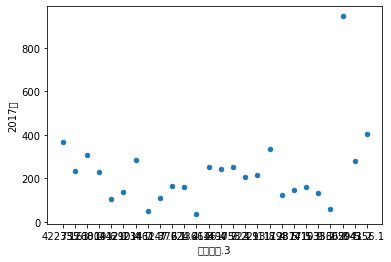

In [76]:
data.plot(kind='scatter',x='처리방법.3',y='2017년')
fit_weight = np.polyfit(data['처리방법.3'],data['2017년'],10)
trend_f = np.poly1d(fit_weight)

plt.plot(df['처리방법.3'], trend_f(df['처리방법.3']),"r-")
#plt.title("y={:.6f}x+({:.6f})".format(fit_weight[0], fit_weight[1]))
plt.show()

In [68]:
#data.astype({'처리방법.3':'float'})
#data=data.drop([0])
data

,자치구,배출량(C),처리방법.3,자치구,2017년
1,합계,"47,995.8","42,235.6",중앙차로,369
2,종로구,882,735.3,종 로 구,235
3,중구,"1,468.2","1,268.0",중 구,308
4,용산구,"1,140.8","1,009.6",용 산 구,228
5,성동구,"2,181.2","1,442.1",성 동 구,106
6,광진구,"1,379.4","1,290.4",광 진 구,139
7,동대문구,"1,367.2","1,234.7",동대문구,285
8,중랑구,"1,585.9","1,461.3",중 랑 구,49
9,성북구,"1,354.6","1,247.6",성 북 구,110
10,강북구,851,772.1,강 북 구,164


In [71]:
data['처리방법.3'] = data['처리방법.3'].str.replace(',', '')

In [74]:
data.astype({'처리방법.3':'float'})

,자치구,배출량(C),처리방법.3,자치구,2017년
1,합계,"47,995.8",42235.6,중앙차로,369
2,종로구,882,735.3,종 로 구,235
3,중구,"1,468.2",1268.0,중 구,308
4,용산구,"1,140.8",1009.6,용 산 구,228
5,성동구,"2,181.2",1442.1,성 동 구,106
6,광진구,"1,379.4",1290.4,광 진 구,139
7,동대문구,"1,367.2",1234.7,동대문구,285
8,중랑구,"1,585.9",1461.3,중 랑 구,49
9,성북구,"1,354.6",1247.6,성 북 구,110
10,강북구,851,772.1,강 북 구,164


In [81]:
data.to_csv("./1.csv")

C:\Users\na\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\na\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
C:\Users\na\anaconda3\envs\pydatavenv\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\na\anaconda3\envs\pydatavenv\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

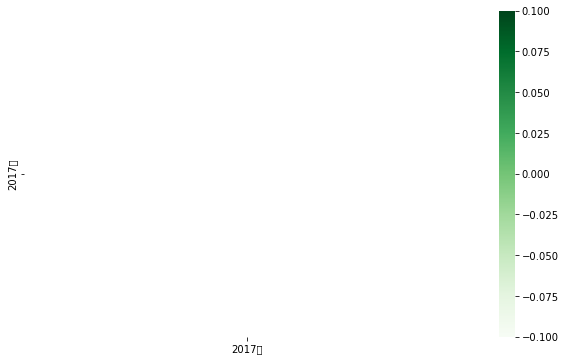